# **Regressao Polinomial-RP** 


In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
import matplotlib.pyplot as plt

In [42]:
dados = pd.read_excel( 'RP-polinomial.xlsx' )
dados.head(2)

,dose,repeticao,peso
0,0,1,134.8
1,0,2,139.7


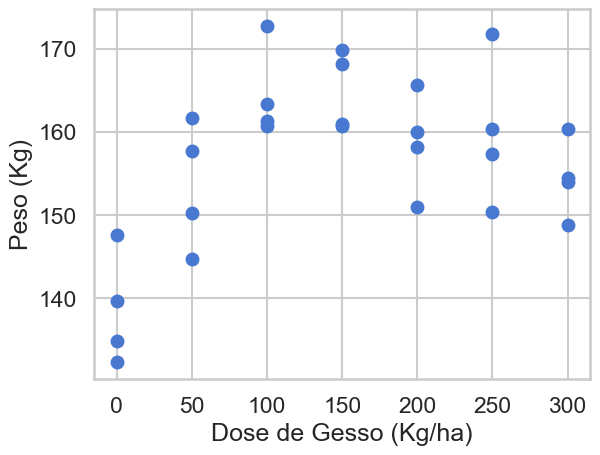

In [43]:
plt.plot(dados.dose, dados.peso, 'o')
plt.xlabel('Dose de Gesso (Kg/ha)')
plt.ylabel('Peso (Kg)')
plt.show()

C:\Users\Paulo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Users\Paulo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\regression.py:261: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)


Text(0.5, 1.0, 'Ordem 5')

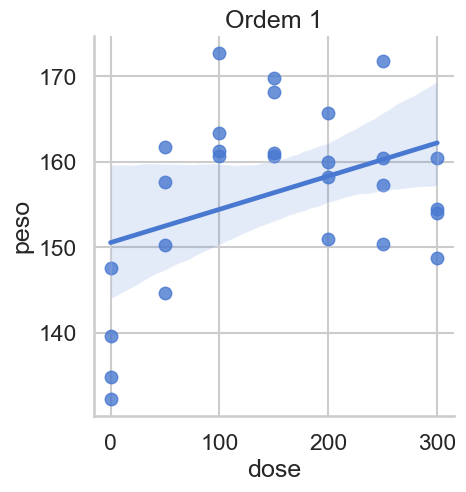

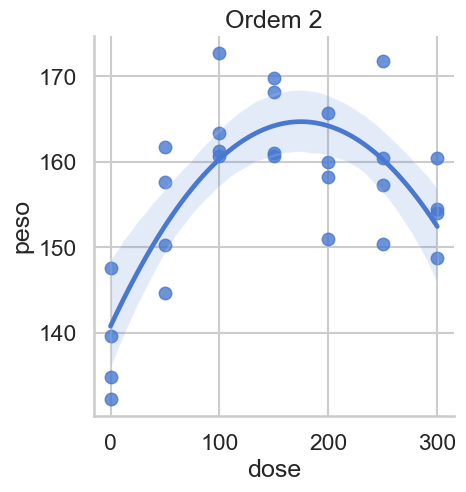

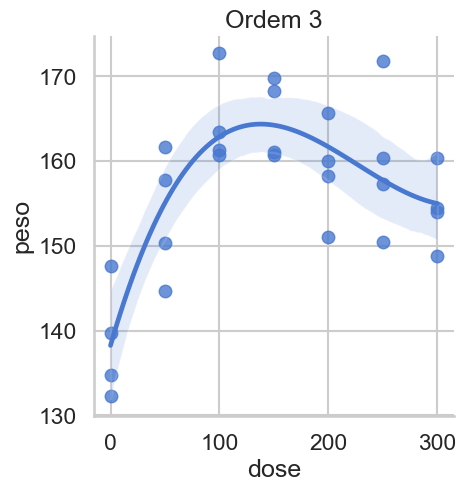

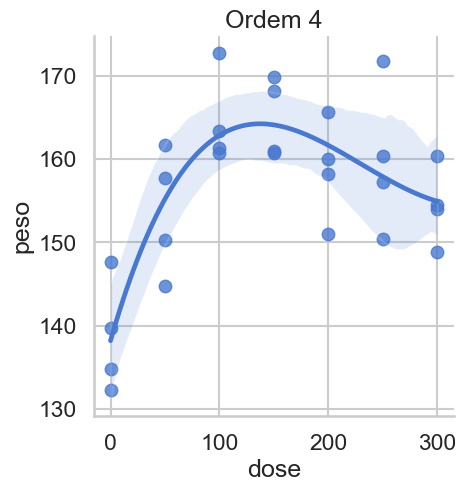

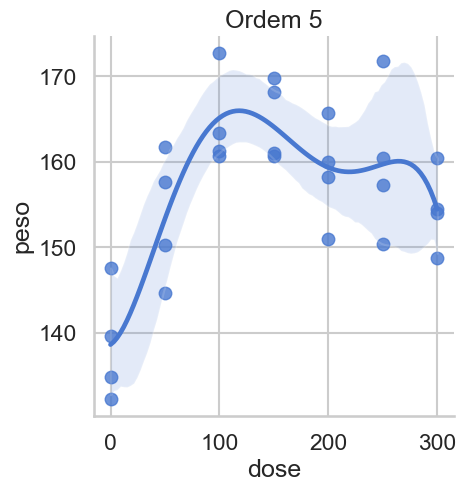

In [44]:
sns.lmplot(x='dose', y='peso', data=dados)
plt.title('Ordem 1')

sns.lmplot(x='dose', y='peso', data=dados, order=2)
plt.title('Ordem 2')

sns.lmplot(x='dose', y='peso', data=dados, order=3)
plt.title('Ordem 3')

sns.lmplot(x='dose', y='peso', data=dados, order=4)
plt.title('Ordem 4')

sns.lmplot(x='dose', y='peso', data=dados, order=5)
plt.title('Ordem 5')

In [45]:
# Treinamento rapido utilizando o Numpy


In [46]:
# O Numpy já faz o treinamento com a constante (coef linear)
x=dados.dose
y=dados.peso
poly=np.polyfit(x,y,2) # 2 grau polinomia
poly

array([-7.82500000e-04,  2.73625000e-01,  1.40783929e+02])

In [47]:

#y

texto = np.poly1d(poly[:3])
texto

poly1d([-7.82500000e-04,  2.73625000e-01,  1.40783929e+02])

In [48]:
yest = np.polyval(poly,x)
yest

array([140.78392857, 140.78392857, 140.78392857, 140.78392857,
       152.50892857, 152.50892857, 152.50892857, 152.50892857,
       160.32142857, 160.32142857, 160.32142857, 160.32142857,
       164.22142857, 164.22142857, 164.22142857, 164.22142857,
       164.20892857, 164.20892857, 164.20892857, 164.20892857,
       160.28392857, 160.28392857, 160.28392857, 160.28392857,
       152.44642857, 152.44642857, 152.44642857, 152.44642857])

In [49]:
#r2
r2 = metrics.r2_score(y, yest)
r2

0.6042768701362256

In [50]:
# linha de produção
m1 = np.polyfit(x,y,1)
m2 = np.polyfit(x,y,2)
m3 = np.polyfit(x,y,3)
m4 = np.polyfit(x,y,4)
m5 = np.polyfit(x,y,5)



In [51]:
#R2
from sklearn.metrics import r2_score
modelos = [m1, m2, m3, m4, m5]
for i, modelo in enumerate(modelos, 1):
    print(f"R² do modelo {i}: {r2_score(y, np.polyval(modelo, x))}")

R² do modelo 1: 0.14962128458903612
R² do modelo 2: 0.6042768701362256
R² do modelo 3: 0.6590973675764129
R² do modelo 4: 0.6591884962233021
R² do modelo 5: 0.6843731447160912


In [52]:
#RmSE = Acuracia
from sklearn.metrics import mean_squared_error
rmse1 = np.sqrt(mean_squared_error(y, np.polyval(m1, x)))
rmse2 = np.sqrt(mean_squared_error(y, np.polyval(m2, x)))
rmse3 = np.sqrt(mean_squared_error(y, np.polyval(m3, x)))
rmse4 = np.sqrt(mean_squared_error(y, np.polyval(m4, x)))
rmse5 = np.sqrt(mean_squared_error(y, np.polyval(m5, x)))
print(f"RMSE do modelo 1: {rmse1}")
print(f"RMSE do modelo 2: {rmse2}")
print(f"RMSE do modelo 3: {rmse3}")
print(f"RMSE do modelo 4: {rmse4}")
print(f"RMSE do modelo 5: {rmse5}")


RMSE do modelo 1: 9.267869357272431
RMSE do modelo 2: 6.322217464898636
RMSE do modelo 3: 5.86798357977568
RMSE do modelo 4: 5.867199225104127
RMSE do modelo 5: 5.646257580356135


Text(0.5, 0, 'Ordem do polinomio')

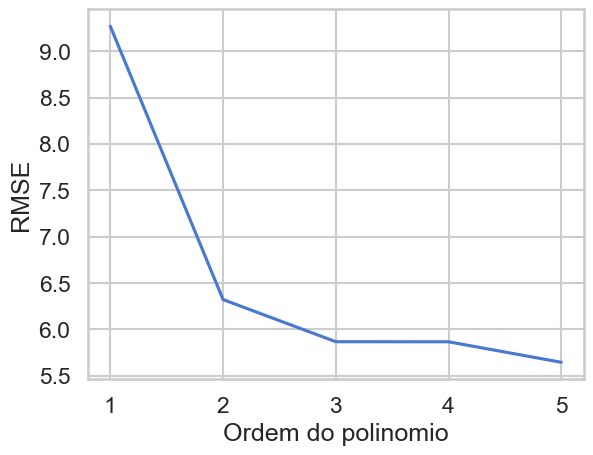

In [53]:
plt.plot([1,2,3,4,5], [rmse1, rmse2, rmse3, rmse4, rmse5])
plt.ylabel('RMSE')
plt.xlabel('Ordem do polinomio')

In [54]:
# no exemplo, escolhemos o polinomio de ordem 3
# Regra 

Text(0.5, 1.0, 'Ordem 3')

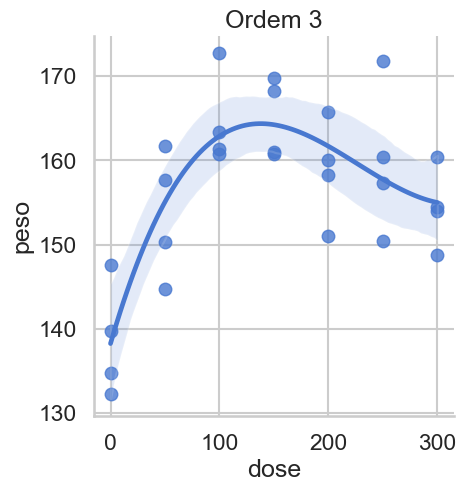

In [55]:
sns.lmplot(x='dose', y='peso', data=dados, order=3)
plt.title('Ordem 3')

In [56]:
#usar o statsmodels para analise completa
import statsmodels.api as sm
import statsmodels.formula.api as smf  

In [57]:
x = sm.add_constant(x)
resultado= smf.ols('y ~ I(x**3)+ I(x**2) + x', data=dados).fit()
resultado.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     15.47
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           8.22e-06
Time:                        11:17:10   Log-Likelihood:                -89.277
No. Observations:                  28   AIC:                             186.6
Df Residuals:                      24   BIC:                             191.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       34.5606      0.763     45.269      0.000      32.985      36.136
I(x ** 3)[0]    34.5606      0.763     45.269      0.000      32.985      36.136
I(x ** 3)[1]  3.389e-06   1.73e-06      1.965      0.061   -1.71e-07    6.95e-06
I(x ** 2)[0]    34.5606      0.763     45.269      0.000      32.985      36.136
I(x ** 2)[1]    -0.0023      0.001     -2.926      0.007      -0.004      -0.001
x[0]            34.5606      0.763     45.269      0.000      32.985      36.136
x[1]             0.4431      0.096      4.593      0.000       0.244       0.642
==============================================================================
Omnibus:                        0.741   Durbin-Watson:                   2.395
Prob(Omnibus):                  0.690   Jarque-Bera (JB):                0.590
Skew:                           0.335   Prob(JB):                        0.745
Kurtosis:                       2.760   Cond. No.                     4.24e+23
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.33e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

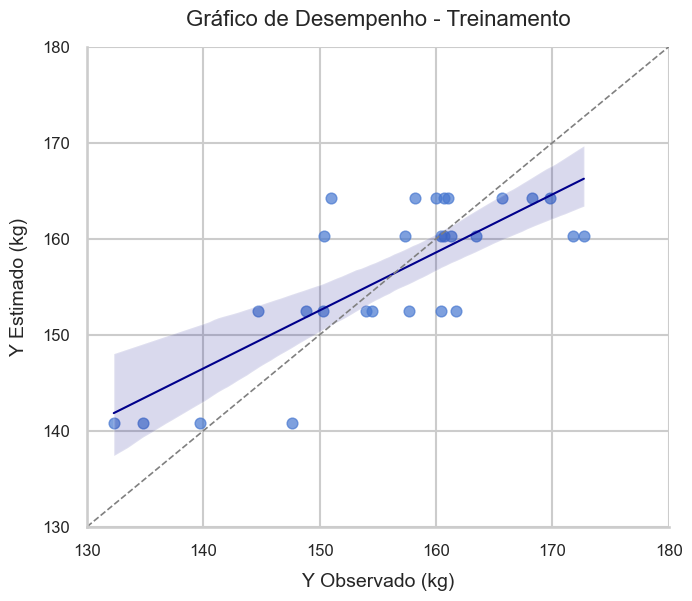

In [60]:
# Dados de desempenho
df_desempenho = pd.DataFrame({'yobs': y, 'yest': yest})

# Configuração do estilo e paleta do Seaborn
sns.set(style="whitegrid", context="talk", palette="muted")

# Gráfico de Dispersão com linha de regressão
sns.lmplot(x='yobs', y='yest', data=df_desempenho, height=6, aspect=1.2, 
           scatter_kws={'s': 60, 'alpha': 0.7}, line_kws={'color': 'darkblue', 'lw': 1.5})

# Remover bordas superiores e direita
sns.despine()

# Linha de 1:1
plt.plot([130, 180], [130, 180], lw=1.2, color='gray', linestyle="--")

# Personalização de eixos e título
plt.xlabel('Y Observado (kg)', fontsize=14, labelpad=10)
plt.ylabel('Y Estimado (kg)', fontsize=14, labelpad=10)
plt.xlim(130, 180)
plt.ylim(130, 180)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Gráfico de Desempenho - Treinamento', fontsize=16, pad=15)

# Exibir o gráfico
plt.show()


In [61]:
obs = df_desempenho.yobs
est = df_desempenho.yest

# Cálculo de Es - Erro Sistemático
yest_medio = np.mean(est)
df_desempenho['sqd'] = (obs- yest_medio)**2
es= np.sqrt(np.sum(df_desempenho.sqd)/len(df_desempenho))

# Cálculo do R2 ajustado
n = len(obs)
p = 1  # Número de preditores (assumindo 1 preditor para R² ajustado)
r2 = metrics.r2_score(obs, est)
R2adj = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print('===TREINAMENTO- DESEMPENHO===')
print('Acurácia:  RMSE  =', np.sqrt(metrics.mean_squared_error(obs, est)).round(3))
print('Acurácia:  MAPE  =', metrics.mean_absolute_percentage_error(obs, est).round(3))
print('Acurácia:  MAE   =', metrics.mean_absolute_error(obs, est).round(3))
print('Acurácia:  MSE   =', metrics.mean_squared_error(obs, est).round(3))
print(f'Precisão:  R² Ajustado = {R2adj.round(2)}')
print('Tendência: ES    =', es.round(3))

===TREINAMENTO- DESEMPENHO===
Acurácia:  RMSE  = 6.322
Acurácia:  MAPE  = 0.033
Acurácia:  MAE   = 5.161
Acurácia:  MSE   = 39.97


AttributeError: 'float' object has no attribute 'round'

In [62]:
dados = pd.read_excel( 'exemploRLM.xlsx')
dados.head(3)

,propriedade,preco_terra,area_prop,area_erodida,distancia_da_BR,distancia_a_rios_e_corregos,benfeitoriasm2,benfeitoriasUN,renda_bruta
0,1,2000,115,0.0,2.0,0,650,10,68112.32
1,2,1900,200,2.0,2.5,1,565,10,33286.79
2,3,800,91,18.0,1.0,2,10,8,2284.92


In [63]:

var_selec = dados.loc[:,'preco_terra':]
var_selec.head(3)

,preco_terra,area_prop,area_erodida,distancia_da_BR,distancia_a_rios_e_corregos,benfeitoriasm2,benfeitoriasUN,renda_bruta
0,2000,115,0.0,2.0,0,650,10,68112.32
1,1900,200,2.0,2.5,1,565,10,33286.79
2,800,91,18.0,1.0,2,10,8,2284.92


''

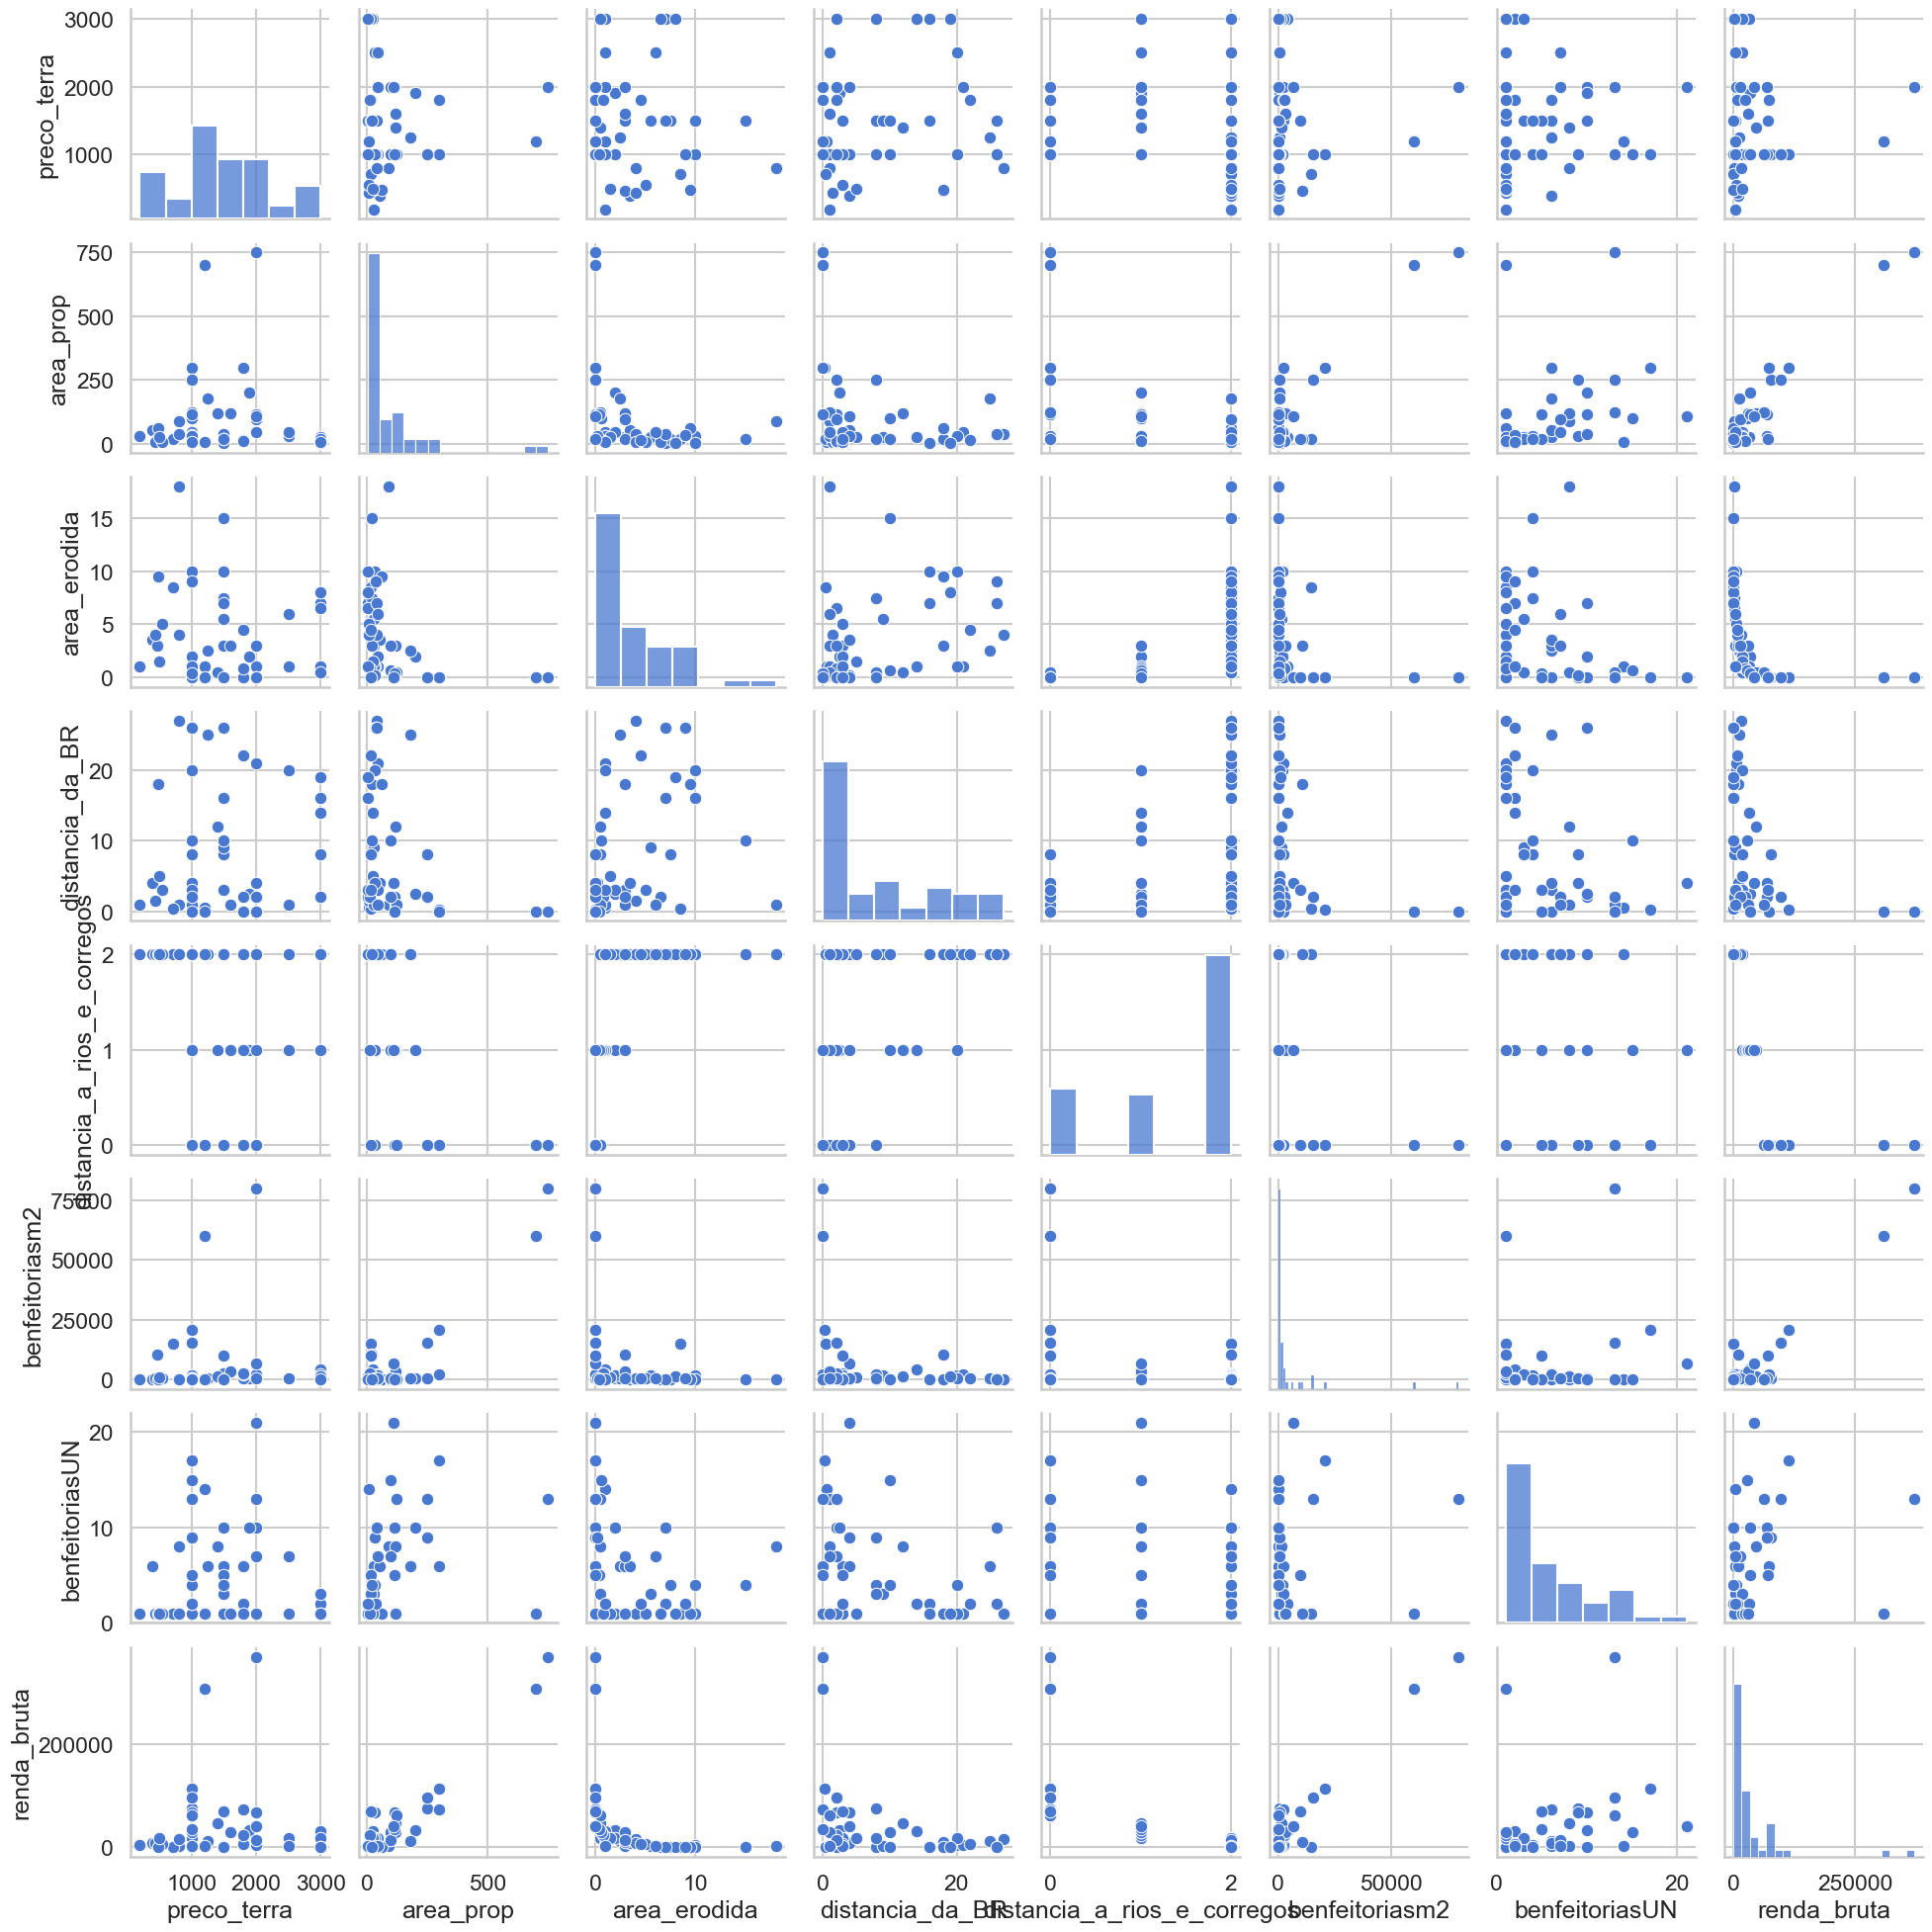

In [64]:
sns.pairplot(var_selec)
;

In [65]:
corrvar = var_selec.corr(method='spearman')
corrvar

,preco_terra,area_prop,area_erodida,distancia_da_BR,distancia_a_rios_e_corregos,benfeitoriasm2,benfeitoriasUN,renda_bruta
preco_terra,1.000000,-0.081961,-0.096714,0.086613,-0.143738,0.202154,0.108603,0.040437
area_prop,-0.081961,1.000000,-0.521489,-0.297359,-0.613896,0.292072,0.524123,0.644753
area_erodida,-0.096714,-0.521489,1.000000,0.403613,0.803643,-0.476963,-0.438186,-0.894091
distancia_da_BR,0.086613,-0.297359,0.403613,1.000000,0.411034,-0.240976,-0.232704,-0.391544
distancia_a_rios_e_corregos,-0.143738,-0.613896,0.803643,0.411034,1.000000,-0.424157,-0.463400,-0.869553
benfeitoriasm2,0.202154,0.292072,-0.476963,-0.240976,-0.424157,1.000000,-0.021676,0.547092
benfeitoriasUN,0.108603,0.524123,-0.438186,-0.232704,-0.463400,-0.021676,1.000000,0.378634
renda_bruta,0.040437,0.644753,-0.894091,-0.391544,-0.869553,0.547092,0.378634,1.000000


In [67]:
corrvar.to_excel('output_correlacao.xlsx')

In [68]:
import pingouin as pg
var_selec.rcorr(stars=True, decimals=4)

,preco_terra,area_prop,area_erodida,distancia_da_BR,distancia_a_rios_e_corregos,benfeitoriasm2,benfeitoriasUN,renda_bruta
preco_terra,-,,,,,,,
area_prop,-0.0131,-,*,*,***,***,*,***
area_erodida,-0.0488,-0.3351,-,*,***,,*,**
distancia_da_BR,0.1164,-0.2923,0.2992,-,**,,*,*
distancia_a_rios_e_corregos,-0.0437,-0.625,0.5846,0.3972,-,**,***,***
benfeitoriasm2,0.0192,0.8715,-0.235,-0.2538,-0.4453,-,,***
benfeitoriasUN,-0.0169,0.3483,-0.3034,-0.2972,-0.5068,0.1804,-,*
renda_bruta,0.0259,0.9418,-0.4017,-0.3246,-0.6831,0.934,0.3097,-


<Axes: >

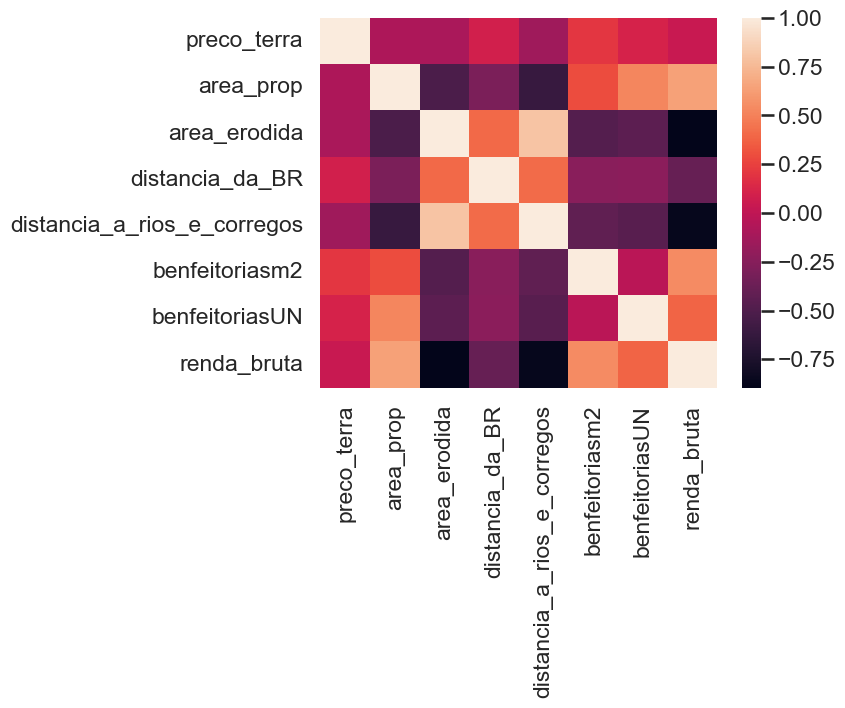

In [69]:
sns.heatmap(corrvar)

<Axes: >

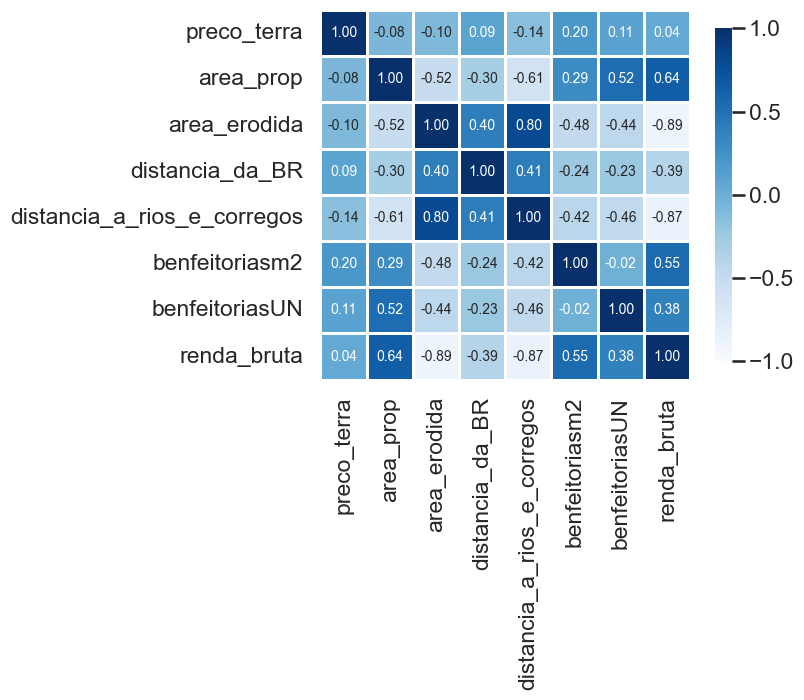

In [73]:
sns.heatmap(
    corrvar,
    square=True,
    linewidths=.9,
    annot=True,
    cmap='Blues',
    vmin=-1,
    vmax=1,
    fmt='.2f',
    annot_kws={'size': 10},
    cbar_kws={'shrink': .9, 'ticks': [-1, -0.5, 0, 0.5, 1]},
)

<Axes: >

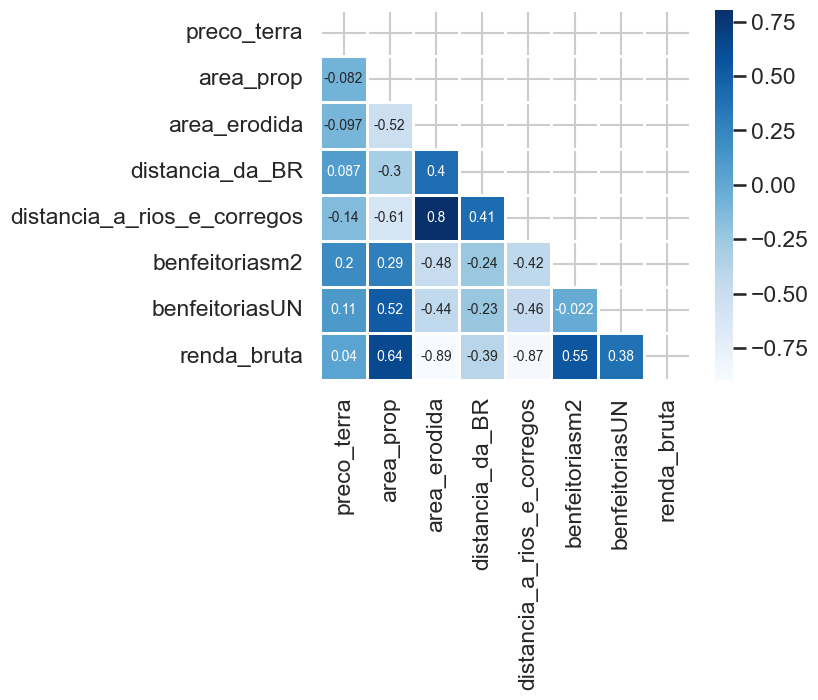

In [78]:
mascara = np.zeros_like(corrvar)
mascara[np.triu_indices_from(mascara)] = True

sns.heatmap(
    corrvar,
    square=True,
    linewidths=.9,
    annot=True,
    cmap='Blues',
    annot_kws={'size': 10},
    mask=mascara
)

In [79]:
var_selec.columns

Index(['preco_terra', 'area_prop', 'area_erodida', 'distancia_da_BR',
       'distancia_a_rios_e_corregos', 'benfeitoriasm2', 'benfeitoriasUN',
       'renda_bruta'],
      dtype='object')

In [80]:
xobs = var_selec.loc[:,:'benfeitoriasUN']
yobs = var_selec.renda_bruta

In [81]:
xobs = sm.add_constant(xobs)
resultado= sm.OLS(yobs, xobs).fit()

print(resultado.summary())

                            OLS Regression Results                            
Dep. Variable:            renda_bruta   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     249.6
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           1.62e-31
Time:                        11:28:03   Log-Likelihood:                -522.85
No. Observations:                  49   AIC:                             1062.
Df Residuals:                      41   BIC:                             1077.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [82]:
# padronizando os dados para avaliação de importancia das variaveis
# procuro alem da estimação de y (rennda_bruta), um entendimento do sistema

In [84]:
from scipy import stats
dados_pad = stats.zscore(var_selec.loc[:,:'benfeitoriasUN'])
dados_pad.head(3)

,preco_terra,area_prop,area_erodida,distancia_da_BR,distancia_a_rios_e_corregos,benfeitoriasm2,benfeitoriasUN
0,0.741911,0.124011,-0.887082,-0.734478,-1.746975,-0.314832,0.924124
1,0.608209,0.687882,-0.398839,-0.675882,-0.506370,-0.320807,0.924124
2,-0.862516,-0.035200,3.507109,-0.851669,0.734236,-0.359816,0.525163


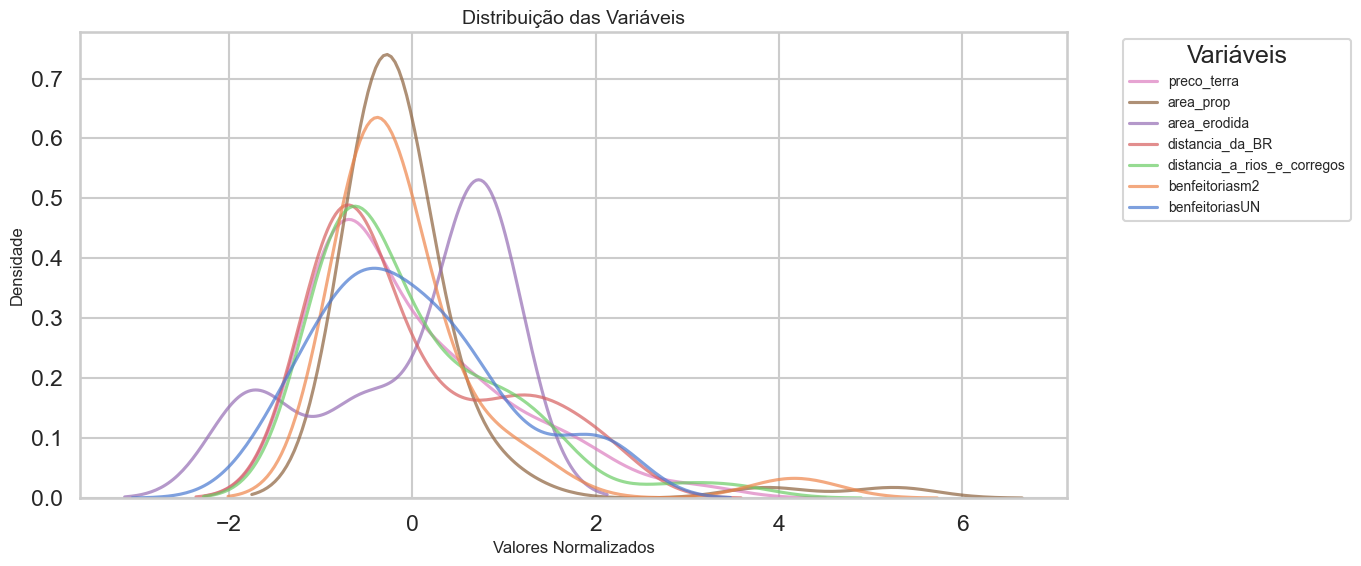

In [92]:


# Definir o tamanho da figura para ser mais largo
plt.figure(figsize=(14, 6))  # Ajuste a largura conforme necessário

# Gráfico de densidade com legendas ajustadas
sns.kdeplot(data=dados_pad, fill=False, common_norm=False, alpha=0.7)

# Posicionar a legenda fora do gráfico
plt.legend(dados_pad.columns, bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10, title="Variáveis")

# Ajuste dos eixos e título
plt.xlabel("Valores Normalizados", fontsize=12)
plt.ylabel("Densidade", fontsize=12)
plt.title("Distribuição das Variáveis", fontsize=14)

# Ajustar o layout para caber melhor
plt.tight_layout()
plt.show()


In [96]:
# Novo modelo com somente 2 variáveis selecionadas
xobs= dados_pad.loc[:, ["area_prop", "benfeitoriasm2"]]
yobs = var_selec.renda_bruta

xobs = sm.add_constant(xobs)
resultado = sm.OLS(yobs, xobs).fit()
resultado.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            renda_bruta   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     362.8
Date:                Tue, 29 Oct 2024   Prob (F-statistic):           6.83e-29
Time:                        11:48:02   Log-Likelihood:                -546.26
No. Observations:                  49   AIC:                             1099.
Df Residuals:                      46   BIC:                             1104.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.625e+04   2477.465     14.631      0.000    3.13e+04    4.12e+04
area_prop       3.657e+04   5051.718      7.239      0.000    2.64e+04    4.67e+04
benfeitoriasm2   3.24e+04   5051.718      6.415      0.000    2.22e+04    4.26e+04
==============================================================================
Omnibus:                       15.584   Durbin-Watson:                   1.835
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               22.318
Skew:                           1.018   Prob(JB):                     1.42e-05
Kurtosis:                       5.606   Cond. No.                         3.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [99]:
#explicação
x = np.linspace(0,10,1000)
y = np.linspace(0,10,1000)
z = x**2+y**2
#z

In [100]:
vx, vy = np.meshgrid(x, y)
vz = vx**2+vy**2
#vz 

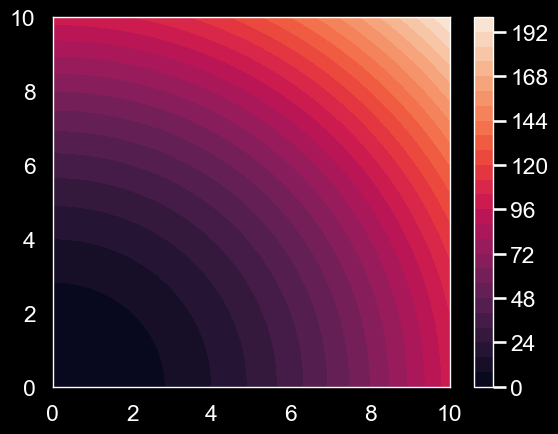

In [111]:
plt.contourf(vx, vy, vz, levels=30)
plt.colorbar()


In [122]:
#area da propriedade varia de 3 - 7750 ha
#benfeitorias por m2 varia de 10 a 80k m2
escalaqqer = np.linspace(0,80,50)
x, y = np.meshgrid(escalaqqer, escalaqqer)
z = 3,625e4 + 3.657e4*x + 3.24e4*y


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

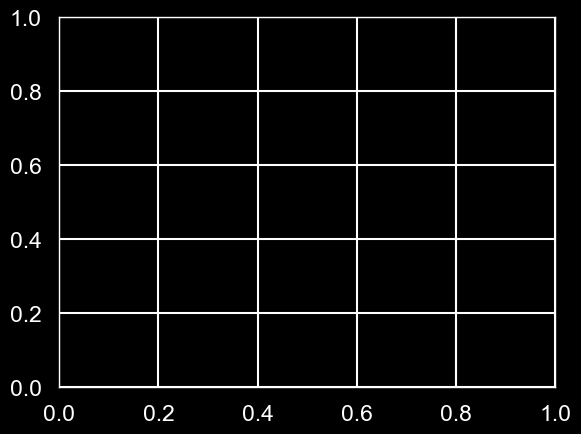

In [124]:
plt.contourf(x,y,z, levels=15,cmap="plasma")
plt.colorbar()
plt.xlabel("Area Propriedade")
plt.ylabel("Benfeitorias por m2")